In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import sqrt
import scipy.stats as sts
from scipy.stats import expon
import numpy as np
import pandas as pd

выбрано экспоненциальное распределение с параметром λ = 0.5. Его можно менять, меняя значение переменной LAMBDA.

In [2]:
LAMBDA = 0.5

# функция плотности распределения
def f(x):           
    if x<0:
        return 0
    else:
        return LAMDA * math.exp(-LAMBDA * x)

для экспоненциального распределения с $\lambda$ = 0.5 $\rightarrow$  μ = 1/$\lambda$ = 2, $D = \sigma^2 = \frac{1}{\lambda^2} = 4$
среднеквадратичное отклонение $\sigma = \sqrt{D} = 2 $

In [3]:
D = 1.0 / (LAMBDA**2) 
SIGMA = D**0.5
M = 1.0 / LAMBDA

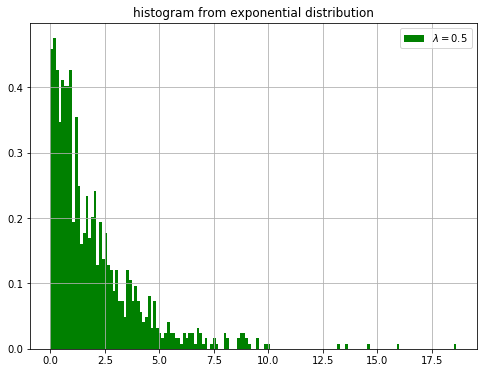

In [15]:
## scale = 1/lambda
## https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.exponential.html
sample = np.random.exponential(scale = 1/LAMBDA, size = 1000)  
fig = plt.figure(figsize=(8,6))
plt.hist(sample, bins = 150, normed=True, color='g', label = "$\lambda = 0.5$")
plt.title("histogram from exponential distribution")
plt.legend(loc='upper right')
plt.grid(b=0.2)

возьмем значения n = 25, 100 и 3000 

In [20]:
print(M, D, SIGMA)

2.0 4.0 2.0


Обозначим $S_n = \sum_{i=1}^n x_i$. Тогда ЦПТ:
$$ \frac{S_n - \mu \cdot n}{\sigma \cdot \sqrt{n}} \rightarrow N(0,1) $$

In [29]:
def plot_distribution(n):
    sample_arrange = []

    for i in range(n):
        local_sample = np.random.exponential(scale = 1/LAMBDA, size=n)
        s_n = np.sum(local_sample)
        element = (s_n - M*n) / (sqrt(n) * SIGMA)
        sample_arrange.append(element)

    plt.hist(sample_arrange, bins=20, normed=True, color='y', label = "histogram", alpha=0.4)
    plt.legend(loc = "upper right")
    plt.ylabel('number of samples')
    plt.xlabel('$x$')

    x = np.linspace(-5, 5, 1000)
    pdf = sts.norm.pdf(x, loc = 0, scale = 1)
    plt.plot(x, pdf, color = 'red', label = "$N = (0,1)$")
    plt.legend(loc = "upper right")
    plt.xlabel('$x$')

    plt.grid(0.2)

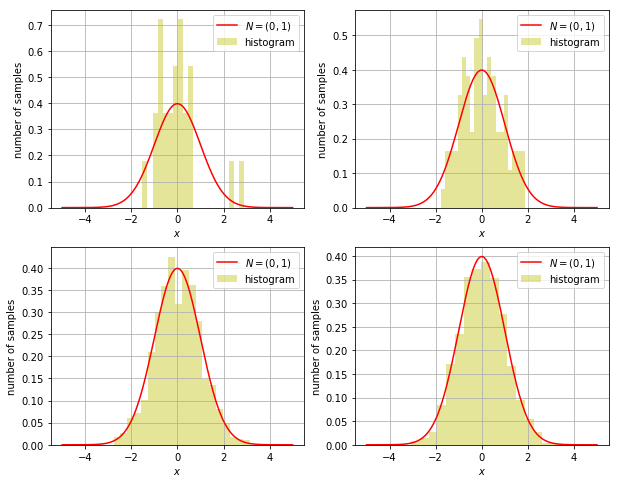

In [44]:
plt.figure(figsize=(10, 8))
n_arr = [25, 100, 1000, 5000]
for i, n in enumerate(n_arr):
    plt.subplot(2,2,i+1)
    plot_distribution(n)

Из графиков видно, что при n $\rightarrow$ ∞, функция распределения выборочного среднего стремится к функции нормального распределения. 
Так, при n = 5000 достигается наибольшее сходство с графиком н-распределения
Заметим, что из последнего графика можно увидеть, что мат. ожидание выбранной случайной величины около 2.0 (при lambda=0.5). 
Действительно, мат. ожидание экспоненциально распределенной случайной величины = 1/lambda = 1/0.5 = 2